<a href="https://colab.research.google.com/github/IS737StockPicker/stonks/blob/main/Logistic_Regression_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%rm -rf stonks/
# import required packages
%matplotlib inline

import pandas as pd
from datetime import datetime
from datetime import date
from sklearn import preprocessing
import matplotlib.pylab as plt
from sklearn.metrics import accuracy_score
# Special package from the class book to import regression summary statistics
!pip install -U dmba;
from dmba import regressionSummary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 16.1 MB/s eta 0:00:00
no display found. Using non-interactive Agg backend


In [ ]:
%%capture
!git clone https://github.com/IS737StockPicker/stonks

EDA



,Date,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,...,Huff_headline_min,Huff_body_min,NYT_headline_mean,NYT_headline_median,NYT_body_mean,NYT_body_median,NYT_headline_max,NYT_headline_min,NYT_body_max,NYT_body_min
0,2022-03-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.80,-0.67,-0.05,0.0,-0.03,0.00,0.88,-0.73,0.91,-0.96
1,2022-03-15,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,-0.76,-0.85,-0.09,0.0,0.02,0.00,0.84,-0.86,0.88,-0.91
2,2022-03-16,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.25,-0.56,-0.06,0.0,-0.00,0.00,0.86,-0.80,0.88,-0.90
3,2022-03-17,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.90,-0.49,-0.02,0.0,-0.05,0.00,0.61,-0.84,0.82,-0.89
4,2022-03-18,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.60,-0.76,-0.06,0.0,-0.05,-0.08,0.83,-0.82,0.86,-0.97


In [ ]:
Guardian_Data= pd.read_csv('/content/stonks/guardian_data.csv')
Guardian_Data.head()
Guardian_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             185 non-null    object 
 1   Headline Mean    185 non-null    float64
 2   Body Mean        185 non-null    float64
 3   Headline Median  185 non-null    float64
 4   Body Median      185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
Huff_News_Data = pd.read_csv('/content/stonks/Huff_News_Avg_News_Sentiment.csv')
Huff_News_Data.head()

,Date,Headline Mean,Body Mean,Headline Median,Body Median
0,2022-03-13,-0.24,0.05,-0.21,0.19
1,2022-03-14,-0.12,-0.06,0.00,0.00
2,2022-03-15,-0.44,-0.39,-0.46,-0.47
3,2022-03-16,0.10,-0.09,0.00,-0.13
4,2022-03-17,-0.20,-0.14,-0.03,-0.03


In [ ]:
Master_Data = pd.read_csv('/content/stonks/master_data.csv')
Master_Data.info()

Check = Master_Data.drop(columns = ['Date','NDX'])
Check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      125 non-null    object 
 1   XLE                       125 non-null    float64
 2   XLF                       125 non-null    float64
 3   XLU                       125 non-null    float64
 4   XLI                       125 non-null    float64
 5   XLK                       125 non-null    float64
 6   XLV                       125 non-null    float64
 7   XLY                       125 non-null    float64
 8   IYR                       125 non-null    float64
 9   AAPL                      125 non-null    float64
 10  XLB                       125 non-null    float64
 11  XLP                       125 non-null    float64
 12  SPY                       125 non-null    float64
 13  ^DJI                      125 non-null    float64
 14  NDX       

## **Task 4:** Scale the data and rerun PCA

In [ ]:
# Scaling Standardization (0 mean, unit variance) is done via the sklearn.preprocessing scale() function
#first we subtract the mean of each column from the number in each row (uni_mdf-Uni_mdf.mean())
# then we divide by the standard deviation
# all of these units are in standard deviations, so how many standard deviations are we away from the mean
Data_to_Scale = Master_Data.drop(columns=['SPY','XLP','Date',  'XLE',  'XLF' , 'XLU' , 'XLI'  ,'XLK'  ,'XLV'  ,'XLY' , 'IYR' , 'AAPL' , 'XLB' , '^DJI' , 'NDX'])
scaled_Master_Data=pd.DataFrame(preprocessing.scale(Data_to_Scale))
scaled_Master_Data.columns

RangeIndex(start=0, stop=12, step=1)

In [ ]:
Data_to_Scale.describe()

,guardian_headline_mean,guardian_body_mean,guardian_headline_median,guardian_body_median,Huff_headline_mean,Huff_body_mean,Huff_headline_median,Huff_body_median,NYT_headline_mean,NYT_headline_median,NYT_body_mean,NYT_body_median
count,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.00000,125.000000,125.000000,125.000000
mean,-0.13608,-0.022720,-0.027200,-0.075360,-0.138720,-0.068880,-0.12896,-0.057360,-0.01520,-0.004320,0.032400,0.016480
std,0.03908,0.108303,0.058276,0.552361,0.238287,0.294411,0.25532,0.321547,0.06324,0.024865,0.097289,0.098556
min,-0.24000,-0.260000,-0.250000,-0.930000,-0.840000,-0.760000,-0.84000,-0.760000,-0.21000,-0.240000,-0.210000,-0.300000
25%,-0.16000,-0.090000,0.000000,-0.560000,-0.260000,-0.260000,-0.34000,-0.270000,-0.06000,0.000000,-0.030000,0.000000
50%,-0.13000,-0.020000,0.000000,-0.110000,-0.120000,-0.080000,0.00000,0.000000,-0.02000,0.000000,0.020000,0.000000
75%,-0.11000,0.040000,0.000000,0.430000,0.000000,0.120000,0.00000,0.100000,0.03000,0.000000,0.090000,0.000000
max,-0.05000,0.350000,0.000000,0.950000,0.400000,0.720000,0.48000,0.720000,0.14000,0.000000,0.270000,0.340000


In [ ]:
(Data_to_Scale - Data_to_Scale.mean())/Data_to_Scale.std()

,guardian_headline_mean,guardian_body_mean,guardian_headline_median,guardian_body_median,Huff_headline_mean,Huff_body_mean,Huff_headline_median,Huff_body_median,NYT_headline_mean,NYT_headline_median,NYT_body_mean,NYT_body_median
0,0.155578,0.117448,0.466742,0.136433,0.078561,0.030162,0.505091,0.178388,-0.550281,0.173736,-0.641388,-0.167214
1,-1.635616,-0.898217,-2.107203,-0.841189,-1.264359,-1.090721,-1.296568,-1.283298,-1.182787,0.173736,-0.127455,-0.167214
2,1.435003,-1.267550,0.466742,-0.859293,1.001818,-0.071736,0.505091,-0.225908,-0.708407,0.173736,-0.333028,-0.167214
3,0.923233,-2.006215,0.466742,-1.402417,-0.257169,-0.241567,0.387592,0.085089,-0.075901,0.173736,-0.846961,-0.167214
4,1.179118,-0.621217,0.466742,-0.424795,-0.886663,-0.785025,-0.748237,-0.505805,-0.708407,0.173736,-0.846961,-0.978934
...,...,...,...,...,...,...,...,...,...,...,...,...
120,-0.100307,1.410112,0.466742,1.639073,-0.215203,-0.411398,0.505091,-0.847902,1.663492,0.173736,-1.052534,-0.167214
121,0.923233,2.148777,0.466742,1.747698,-0.467000,-2.347468,-1.374901,-2.154090,-0.392154,0.173736,-0.538601,-0.167214
122,1.435003,3.441441,0.466742,1.856323,0.162493,1.083112,0.113426,0.955880,0.082226,0.173736,1.105983,1.253296
123,-0.612077,0.302114,0.466742,0.317474,-1.096494,1.151044,-1.139902,1.360176,-1.340914,0.173736,-0.949747,-1.486259


Now, let's check that the scale function worked as intended, that is, it created columns with zero mean and unit variance

In [ ]:
# PCA after scaling
# you never want to go below 70% of signal of original data

pcs = PCA(n_components=12)
pcs.fit(scaled_df)

# view the importance of principal components
np.cumsum(pcs.explained_variance_ratio_.round(3))

array([0.304, 0.574, 0.645, 0.708, 0.764, 0.809, 0.847, 0.882, 0.911,
       0.937, 0.96 , 0.978])

Interesting the new times has much different values ten the huff and guardian


In [ ]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression

# sklearn data and model packages
from sklearn.model_selection import train_test_split #splits data between training and test sets
from sklearn.model_selection import KFold #use k-1 groups to train models
from sklearn.model_selection import cross_val_score #

from sklearn.metrics import * #evaluates the confusion metrics

import seaborn as sns

Checking to see how it plotted

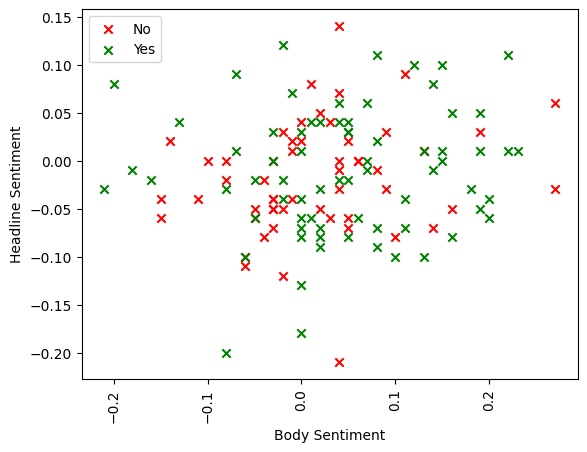

In [ ]:
# create a scatter plot of Experience vs. Training and keep track
# of the outcome (1 or 0) using colors
fig, ax = plt.subplots()

subset0 = Master_Data.loc[Master_Data['SPY']== 0]
ax.scatter(subset0.NYT_body_mean, subset0.NYT_headline_mean, marker='x', label='No', color='red')

subset1 = Master_Data.loc[Master_Data['SPY']== 1]
ax.scatter(subset1.NYT_body_mean, subset1.NYT_headline_mean, marker='x', label='Yes', color='green')

plt.ylabel('Headline Sentiment')  # set x-axis label
plt.xlabel('Body Sentiment')  # set y-axis label
plt.xticks(rotation=90)  

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels);

In [ ]:
# Stock Market data is time series 
# with the training data I did the first 60 days 
# and then the test data is following days
# for presentation, I oringinally followed profs but then changed to time series 

stocks = ['SPY','XLE','XLF','XLP','XLU','XLI','IYR','AAPL','NDX']
#,'XLP',  'XLE',  'XLF' , 'XLU' , 'XLI'  ,'XLK'  ,'XLV'  ,'XLY' , 'IYR' , 'AAPL' , 'XLB' , '^DJI' , 'NDX']
for stock in stocks:
    Master_Data[stock] = Master_Data[stock].astype('category')
    #print(stock)
    y = Master_Data[stock]
    #print(y[stock])
    X = Master_Data.drop(columns=['SPY','XLP','Date',  'XLE',  'XLF' , 'XLU' , 'XLI'  ,'XLK'  ,'XLV'  ,'XLY' , 'IYR' , 'AAPL' , 'XLB' , '^DJI' , 'NDX'])
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.4, random_state = 1, stratify = y)
    lr = LogisticRegression(penalty="none", solver='lbfgs')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(stock.lower())
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test, y_pred))
    print(len(y_train)+len(y_test))
    print('------------------------------------')

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

spy
[[ 4 18]
 [ 8 20]]
0.48
125
------------------------------------
xle
[[12 11]
 [12 15]]
0.54
125
------------------------------------
xlf
[[ 9 14]
 [15 12]]
0.42
125
------------------------------------
xlp
[[13 10]
 [14 13]]
0.52
125
------------------------------------
xlu
[[10 14]
 [13 13]]
0.46
125
------------------------------------
xli
[[ 7 13]
 [11 19]]
0.52
125
------------------------------------
iyr
[[ 9 16]
 [10 15]]
0.48
125
------------------------------------
aapl
[[ 6 16]
 [ 5 23]]
0.58
125
------------------------------------
ndx
[[ 9 15]
 [ 9 17]]
0.52
125
------------------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-

## Train/Test Split

first attempt was training data based on random_state
The second one is training data based on date, since we are using time series data

Standardizing the data

In [ ]:
# Define categorical variable (not stricly needed by good practice)
stocks = ['SPY','XLP','Date',  'XLE',  'XLF' , 'XLU' , 'XLI'  ,'XLK'  ,'XLV'  ,'XLY' , 'IYR' , 'AAPL' , 'XLB' , '^DJI' , 'NDX']


Master_Data['AAPL'] = Master_Data['AAPL'].astype('category')

# Define X and y
y = Master_Data['AAPL']
X = Master_Data.drop(columns=['SPY','XLP','Date',  'XLE',  'XLF' , 'XLU' , 'XLI'  ,'XLK'  ,'XLV'  ,'XLY' , 'IYR' , 'AAPL' , 'XLB' , '^DJI' , 'NDX'])
X.head()
#print(y)

,guardian_headline_mean,guardian_body_mean,guardian_headline_median,guardian_body_median,Huff_headline_mean,Huff_body_mean,Huff_headline_median,Huff_body_median,NYT_headline_mean,NYT_headline_median,NYT_body_mean,NYT_body_median
0,-0.13,-0.01,0.00,-0.00,-0.12,-0.06,0.00,0.00,-0.05,0.0,-0.03,0.00
1,-0.20,-0.12,-0.15,-0.54,-0.44,-0.39,-0.46,-0.47,-0.09,0.0,0.02,0.00
2,-0.08,-0.16,0.00,-0.55,0.10,-0.09,0.00,-0.13,-0.06,0.0,-0.00,0.00
3,-0.10,-0.24,0.00,-0.85,-0.20,-0.14,-0.03,-0.03,-0.02,0.0,-0.05,0.00
4,-0.09,-0.09,0.00,-0.31,-0.35,-0.30,-0.32,-0.22,-0.06,0.0,-0.05,-0.08


In [ ]:
# Use train/test split function
#the split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.4, random_state = 1, stratify = y)
X_train

,guardian_headline_mean,guardian_body_mean,guardian_headline_median,guardian_body_median,Huff_headline_mean,Huff_body_mean,Huff_headline_median,Huff_body_median,NYT_headline_mean,NYT_headline_median,NYT_body_mean,NYT_body_median
5,-0.12,-0.12,0.00,-0.60,0.01,-0.13,0.03,-0.24,-0.08,0.0,0.05,0.00
52,-0.12,-0.02,0.00,-0.08,-0.06,0.33,-0.03,0.42,-0.07,0.0,0.02,0.00
13,-0.08,0.02,0.00,0.26,-0.31,-0.19,-0.31,-0.19,0.02,0.0,-0.01,0.00
100,-0.13,-0.05,-0.03,-0.42,-0.04,0.12,0.00,0.00,0.01,0.0,-0.01,0.00
116,-0.12,0.05,0.00,0.65,-0.32,-0.22,-0.36,-0.30,0.02,0.0,0.05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6,-0.19,-0.07,-0.05,-0.26,-0.17,-0.35,-0.38,-0.38,0.01,0.0,-0.07,0.00
57,-0.06,0.19,0.00,0.77,0.00,0.38,0.00,0.38,-0.04,0.0,-0.03,0.00
58,-0.12,0.11,0.00,0.60,-0.34,-0.67,-0.34,-0.67,-0.04,0.0,-0.15,0.00
90,-0.14,-0.10,0.00,-0.69,-0.13,-0.15,0.00,0.03,-0.08,0.0,0.10,0.03


In [ ]:
# Standardize training and validation features using 'StandatdScaler()'
# (a slightly different method than what we did in the PCA lab)

# the first line defines the scaling object
scaler = preprocessing.StandardScaler()

# the second line specifies which data to use to compute means and variances
scaler.fit(X_train)
# important: in this step, you should fit the scaler only to training data, 
# and not the testing data. We assume testing data is never available to us
# in the training stage

# the third line scales the data using the means and variances computed in the
# previous step
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Note, there is no need to scale the target y variable, since this is what
# we are trying to predict


In [ ]:
# total number of rows in each resulting dataset
print('X_train rows = ', len(X_train_scaled), 'X_test rows = ', len(X_test_scaled))
print('y_train rows = ', len(y_train), 'y_test rows = ', len(y_test))

X_train rows =  75 X_test rows =  50
y_train rows =  75 y_test rows =  50


In [ ]:
# What is the proportion of 1's we obtain after splitting?

prop_y_orig = round(sum(y)/len(y),2);
prop_y_train = round(sum(y_train)/len(y_train),2);
prop_y_test = round(sum(y_test)/len(y_test),2);

print("% of 1's in orig dataset=", prop_y_orig)
print("% of 1's in y_train=", prop_y_train) 
print("% of 1's in y_test=", prop_y_test)

% of 1's in orig dataset= 0.57
% of 1's in y_train= 0.57
% of 1's in y_test= 0.56


In [ ]:
# total number of rows in each resulting dataset are unchanged
print('X_train rows = ', len(X_train_scaled), 'X_test rows = ', len(X_test_scaled))
print('y_train rows = ', len(y_train), 'y_test rows = ', len(y_test))

X_train rows =  75 X_test rows =  50
y_train rows =  75 y_test rows =  50


In [ ]:
# What is the proportion of 1's we obtain after stratifying?
prop_y_orig = round(sum(y)/len(y),2);
prop_y_train = round(sum(y_train)/len(y_train),2);
prop_y_test = round(sum(y_test)/len(y_test),2);

print("% of 1's in orig dataset=", prop_y_orig)
print("% of 1's in y_train=", prop_y_train) 
print("% of 1's in y_test=", prop_y_test)

% of 1's in orig dataset= 0.57
% of 1's in y_train= 0.57
% of 1's in y_test= 0.56


**COMPARE SCALED VS NON SCALED**

In [ ]:
# Logistic Regression
lr = LogisticRegression(penalty="none", solver='lbfgs')
lr.fit(X_train_scaled, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [ ]:
# Run class y predictions
y_pred = lr.predict(X_test_scaled)

In [ ]:
# Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[ 6, 16],
       [ 5, 23]])

In [ ]:
accuracy_score(y_test, y_pred)

0.58

## Prediction model


In [ ]:
#logreg model S (details covered in future lecture)
model = LogisticRegression(max_iter = 1000).fit(X_train_scaled, y_train)
model.__getstate__
#help(model)

# extract the probabilities
y_probs = model.predict_proba(X_test_scaled)[:,1]

# extract the predictions of the model using the X test set
# careful, this assumes a cutoff probability of 50% to make classification decisions
y_pred = model.predict(X_test_scaled)

NameError: ignored

In [ ]:
# Plot to visualize the data
plt.scatter(y_df['probability'], y_test)
plt.xlabel('Probability Score')
plt.ylabel('True Outcome (0 or 1)')
plt.show()

NameError: ignored

## Confusion Matrix
Important: we are interested in prediction accuracy on new unseen data, therefore, the confusion matrix must compare the out-of-sample y outcomes from the testing array y_test, to the predicted outcomes y_pred which are obtained by using the X data from the X_test set.


In [ ]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 6, 16],
       [ 5, 23]])

The issue here, is we don't know the convention used to display the output. Where are the predictions vs. the true values?

In [ ]:
# Put it into a dataframe and label
#for porject we should use this
cm_df = pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1']);
cm_df

,Pred 0,Pred 1
True 0,6,16
True 1,5,23


In [ ]:
# alternative: pandas has a function called crosstab
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,6,16,22
1.0,5,23,28
All,11,39,50


In [ ]:
# You can also normalize it to have percentages instead of absolute numbers
cmn=confusion_matrix(y_test,y_pred, normalize='true');
cmn

array([[0.27272727, 0.72727273],
       [0.17857143, 0.82142857]])

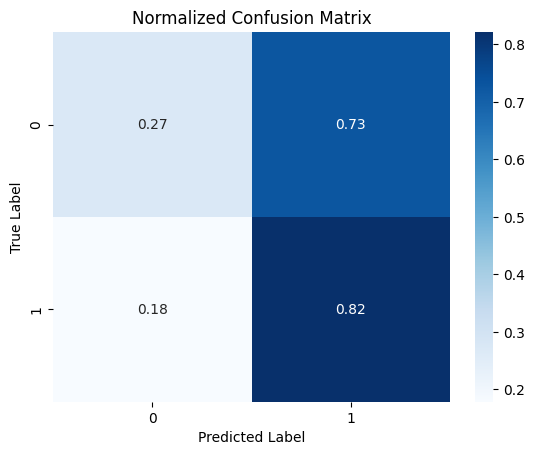

In [ ]:
# Then put it in a heatmap
sns.heatmap(cmn, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()

**Classification Report**

* Accuracy is defined as (tp+tn) / total
* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

* The F1 score can be interpreted as the harmonic mean of the precision and recall.

* The support is the number of occurrences of each class in y_true.

In [ ]:
# Manual computation of metrics of interest
tot = len(y_test) #total patients in test set
p = sum(y_test) #actual positives
n = tot-p #actual negatives
pp = sum(y_pred) #predicted positives
pn = tot - pp #predicted negatives

tp = cm[1,1]; # true positives
tn = cm[0,0]; # true negatives
fp = cm[0,1]; # false positives
fn = cm[1,0]; # false negatives

print('total days =',tot, )
print('actual positives =', p, '|', 'actual negatives =', n,) 
print('predicted positives =', pp, '|', 'predicted negatives =', pn)
print('true positives = ', tp, '|', 'false positives =', fp, '|', 'true negatives = ', tn, '|', 'false negatives = ', fn)

# Manual computations
m_acc = (tp + tn) / tot #accuracy
tpr = tp / p # true positive rate
fpr = fp / n # false positive rate

print('Accuracy = ', m_acc.round(2), ',', 'TPR =', tpr.round(2), ',', "FPR =", fpr.round(2))

total days = 50
actual positives = 28.0 | actual negatives = 22.0
predicted positives = 39.0 | predicted negatives = 11.0
true positives =  23 | false positives = 16 | true negatives =  6 | false negatives =  5
Accuracy =  0.58 , TPR = 0.82 , FPR = 0.73


<h1>Data Analysis Version 2</h1>


**master_data.csv**
Model 1: Median headline for three news sites
Model 2: Mean headline for three news sites
Model 3: Median body for three news sites
Model 4: Mean body for three news sites
Model 5: Min/Mix headline for three news sites
Model 6: Min/Max body for three news sites

**Master_data_future.csv (predict the future)**
Model 1: Median headline for three news sites
Model 2: Mean headline for three news sites
Model 3: Median body for three news sites
Model 4: Mean body for three news sites
Model 5: Min/Mix headline for three news sites
Model 6: Min/Max body for three news sites


In [ ]:
stock_data= pd.read_csv('/content/stonks/master_data.csv')
#stock_data['Date'] = stock_data['Date'].dt.date(stock_data['Date'])
stock_data.head()

,Date,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,...,Huff_headline_min,Huff_body_min,NYT_headline_mean,NYT_headline_median,NYT_body_mean,NYT_body_median,NYT_headline_max,NYT_headline_min,NYT_body_max,NYT_body_min
0,2022-03-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.80,-0.67,-0.05,0.0,-0.03,0.00,0.88,-0.73,0.91,-0.96
1,2022-03-15,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,-0.76,-0.85,-0.09,0.0,0.02,0.00,0.84,-0.86,0.88,-0.91
2,2022-03-16,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.25,-0.56,-0.06,0.0,-0.00,0.00,0.86,-0.80,0.88,-0.90
3,2022-03-17,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.90,-0.49,-0.02,0.0,-0.05,0.00,0.61,-0.84,0.82,-0.89
4,2022-03-18,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.60,-0.76,-0.06,0.0,-0.05,-0.08,0.83,-0.82,0.86,-0.97


In [ ]:
#Specify Target Vars

tickers = stock_data.iloc[:,:15]
tickers = tickers.drop(columns=['Date'])
tickers

,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,XLB,XLP,SPY,^DJI,NDX
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
121,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
122,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
123,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [ ]:

baseline_acc = {}
for ticker in tickers:
  baseline_acc[ticker] = round(sum(stock_data[ticker])/125,2)
  print(sum(stock_data[ticker])/125)

0.544
0.536
0.52
0.592
0.544
0.568
0.504
0.504
0.568
0.48
0.544
0.568
0.536
0.52


Logistic Regression run for each of the target variables using 6 iterations of input data (mean/median/min_max for headline sentiment score and body sentiment score)

In [ ]:

present_acc_scores={}
baseline_present = {}
for ticker in tickers:
  #print(ticker)
  mean_headline_var = [ticker,'guardian_headline_mean','Huff_headline_mean','NYT_headline_mean']
  median_body_var = [ticker,'guardian_body_median','Huff_body_median','NYT_body_median']
  mean_body_var = [ticker,'guardian_body_mean','Huff_body_mean','NYT_body_mean']
  median_headline_var = [ticker,'guardian_headline_median','Huff_headline_median','NYT_headline_median']
  min_max_headline_var = [ticker,'guardian_headline_min','guardian_headline_max','Huff_headline_min','Huff_headline_max','NYT_headline_min','NYT_headline_max']
  min_max_body_var = [ticker,'guardian_body_min','guardian_body_max','Huff_body_min','Huff_body_max','NYT_body_min','NYT_body_max']
  model_inputs = [mean_headline_var,mean_body_var,median_headline_var,median_body_var,min_max_headline_var,min_max_body_var]
  input_arr = []
  for inputs in range(len(model_inputs)):
    accuracy_df = stock_data[model_inputs[inputs]]
    y_nonscaled = accuracy_df[[ticker]]
    X_nonscaled = accuracy_df.drop(columns=[ticker])
    scaleOutput = MinMaxScaler()
    scaleInput = MinMaxScaler()
    y = scaleOutput.fit_transform(y_nonscaled)
    X = scaleInput.fit_transform(X_nonscaled)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.28, random_state=5)
    

    lr = LogisticRegression(penalty="none", solver='lbfgs')
    lr.fit(X_train, y_train.ravel())
    y_pred = lr.predict(X_valid)
    input_arr.append(round(accuracy_score(y_valid, y_pred),2))



      # extract the predictions of the model using the X test set
      # careful, this assumes a cutoff probability of 50% to make classification decisions
    #  y_pred = model.predict(X_test_scaled)
  #  stock_nnet = MLPClassifier(
    #  hidden_layer_sizes=(2), 
    #  activation='logistic', 
     # solver='lbfgs', 
    #  random_state=1)
   # stock_nnet.fit(X_train, y_train.ravel())
   # y_pred = stock_nnet.predict(X_valid)
    #input_arr.append(round(accuracy_score(y_valid, y_pred),2))
    
  present_acc_scores[ticker] = input_arr
  baseline_present[ticker] = round(sum(y_pred)/35,2)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: F

In [ ]:
baseline_present

{'XLE': 0.71,
 'XLF': 0.57,
 'XLU': 0.49,
 'XLI': 0.74,
 'XLK': 0.54,
 'XLV': 0.74,
 'XLY': 0.63,
 'IYR': 0.31,
 'AAPL': 0.66,
 'XLB': 0.37,
 'XLP': 0.69,
 'SPY': 0.71,
 '^DJI': 0.63,
 'NDX': 0.46}

In [ ]:
baseline_present_df

,0
XLE,0.71
XLF,0.57
XLU,0.49
XLI,0.74
XLK,0.54
XLV,0.74
XLY,0.63
IYR,0.31
AAPL,0.66
XLB,0.37


In [ ]:

present_outcomes_df = pd.DataFrame.from_dict(present_acc_scores).T

baseline_present_df = pd.DataFrame.from_dict([baseline_present]).T
present_outcomes_df = pd.concat([baseline_present_df, present_outcomes_df], axis=1)
present_outcomes_df.columns = ['baseline_acc','headline_mean_acc', 'body_mean_acc', 'headline_median_acc', 'body_median_acc', 'headline_min_max', 'body_min_max']
present_outcomes_df
     


,baseline_acc,headline_mean_acc,body_mean_acc,headline_median_acc,body_median_acc,headline_min_max,body_min_max
XLE,0.71,0.46,0.46,0.46,0.51,0.54,0.34
XLF,0.57,0.69,0.54,0.66,0.34,0.43,0.49
XLU,0.49,0.40,0.57,0.40,0.49,0.31,0.60
XLI,0.74,0.63,0.63,0.60,0.43,0.60,0.69
XLK,0.54,0.63,0.63,0.57,0.46,0.40,0.54
XLV,0.74,0.49,0.63,0.60,0.49,0.46,0.51
XLY,0.63,0.57,0.60,0.51,0.57,0.43,0.51
IYR,0.31,0.57,0.46,0.66,0.37,0.37,0.54
AAPL,0.66,0.49,0.54,0.49,0.46,0.37,0.54
XLB,0.37,0.54,0.40,0.49,0.23,0.43,0.49


In [ ]:

for outcomes in present_outcomes_df:
  print(sum(present_outcomes_df[outcomes])-sum(present_outcomes_df['baseline_acc']))


0.0
-0.6399999999999997
-0.669999999999999
-0.6699999999999999
-1.9799999999999995
-2.130000000000001
-0.6299999999999999


In [ ]:

future_df = pd.read_csv('/content/stonks/master_data_future.csv')
future_df

,Date,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,...,Huff_headline_min,Huff_body_min,NYT_headline_mean,NYT_headline_median,NYT_body_mean,NYT_body_median,NYT_headline_max,NYT_headline_min,NYT_body_max,NYT_body_min
0,2022-03-14,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,-0.80,-0.67,-0.05,0.0,-0.03,0.00,0.88,-0.73,0.91,-0.96
1,2022-03-15,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.76,-0.85,-0.09,0.0,0.02,0.00,0.84,-0.86,0.88,-0.91
2,2022-03-16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.25,-0.56,-0.06,0.0,-0.00,0.00,0.86,-0.80,0.88,-0.90
3,2022-03-17,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.90,-0.49,-0.02,0.0,-0.05,0.00,0.61,-0.84,0.82,-0.89
4,2022-03-18,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.60,-0.76,-0.06,0.0,-0.05,-0.08,0.83,-0.82,0.86,-0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2022-09-07,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,-0.78,-0.57,0.09,0.0,-0.07,0.00,0.65,-0.86,0.84,-0.93
121,2022-09-08,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.77,-0.83,-0.04,0.0,-0.02,0.00,0.75,-0.90,0.92,-0.93
122,2022-09-09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.60,0.00,-0.01,0.0,0.14,0.14,0.81,-0.80,0.85,-0.91
123,2022-09-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.79,0.00,-0.10,0.0,-0.06,-0.13,0.75,-0.90,0.89,-0.89


In [ ]:
future_baseline_acc = {}
for ticker in tickers:
  future_baseline_acc[ticker] = round(sum(future_df[ticker])/125,2)
print(future_baseline_acc)

{'XLE': 0.56, 'XLF': 0.54, 'XLU': 0.54, 'XLI': 0.59, 'XLK': 0.54, 'XLV': 0.57, 'XLY': 0.51, 'IYR': 0.5, 'AAPL': 0.58, 'XLB': 0.48, 'XLP': 0.54, 'SPY': 0.58, '^DJI': 0.54, 'NDX': 0.53}


In [ ]:


future_acc_scores={}
baseline_future = {}
for ticker in tickers:
  #print(ticker)
  mean_headline_var = [ticker,'guardian_headline_mean','Huff_headline_mean','NYT_headline_mean']
  median_body_var = [ticker,'guardian_body_median','Huff_body_median','NYT_body_median']
  mean_body_var = [ticker,'guardian_body_mean','Huff_body_mean','NYT_body_mean']
  median_headline_var = [ticker,'guardian_headline_median','Huff_headline_median','NYT_headline_median']
  min_max_headline_var = [ticker,'guardian_headline_min','guardian_headline_max','Huff_headline_min','Huff_headline_max','NYT_headline_min','NYT_headline_max']
  min_max_body_var = [ticker,'guardian_body_min','guardian_body_max','Huff_body_min','Huff_body_max','NYT_body_min','NYT_body_max']
  model_inputs = [mean_headline_var,mean_body_var,median_headline_var,median_body_var,min_max_headline_var,min_max_body_var]
  input_arr = []
  for inputs in range(len(model_inputs)):
    accuracy_df = future_df[model_inputs[inputs]]
    y_nonscaled = accuracy_df[[ticker]]
    X_nonscaled = accuracy_df.drop(columns=[ticker])
    scaleOutput = MinMaxScaler()
    scaleInput = MinMaxScaler()
    y = scaleOutput.fit_transform(y_nonscaled)
    X = scaleInput.fit_transform(X_nonscaled)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.28, random_state=5)
    lr = LogisticRegression(penalty="none", solver='lbfgs')
    lr.fit(X_train, y_train.ravel())
    y_pred = lr.predict(X_valid)
    input_arr.append(round(accuracy_score(y_valid, y_pred),2))



      # extract the predictions of the model using the X test set
      # careful, this assumes a cutoff probability of 50% to make classification decisions
    #  y_pred = model.predict(X_test_scaled)
  #  stock_nnet = MLPClassifier(
    #  hidden_layer_sizes=(2), 
    #  activation='logistic', 
     # solver='lbfgs', 
    #  random_state=1)
   # stock_nnet.fit(X_train, y_train.ravel())
   # y_pred = stock_nnet.predict(X_valid)
    #input_arr.append(round(accuracy_score(y_valid, y_pred),2))
    
  future_acc_scores[ticker] = input_arr
  baseline_future[ticker] = round(sum(y_pred)/35,2)
  print(y_pred)
  

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: F

[1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.]
[1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: F

[1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: F

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: F

[0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.]
[0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: F

[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
[0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: F

In [ ]:
future_outcomes_df = pd.DataFrame.from_dict(future_acc_scores).T
future_baseline_df = pd.DataFrame.from_dict([baseline_future]).T

future_baseline_df
future_outcomes_df = pd.concat([future_baseline_df, future_outcomes_df], axis=1)
future_outcomes_df.columns = ['future_baseline_acc', 'headline_mean_acc', 'body_mean_acc', 'headline_median_acc', 'body_median_acc', 'headline_min_max', 'body_min_max']
future_outcomes_df

,future_baseline_acc,headline_mean_acc,body_mean_acc,headline_median_acc,body_median_acc,headline_min_max,body_min_max
XLE,0.60,0.60,0.46,0.63,0.49,0.51,0.34
XLF,0.43,0.57,0.54,0.54,0.54,0.63,0.37
XLU,0.46,0.37,0.69,0.51,0.60,0.57,0.60
XLI,0.89,0.57,0.57,0.54,0.57,0.46,0.63
XLK,0.34,0.49,0.40,0.66,0.43,0.37,0.40
XLV,0.34,0.63,0.54,0.74,0.60,0.37,0.40
XLY,0.20,0.54,0.49,0.57,0.54,0.46,0.31
IYR,0.54,0.66,0.34,0.57,0.51,0.37,0.34
AAPL,0.40,0.60,0.49,0.63,0.51,0.54,0.40
XLB,0.29,0.54,0.40,0.43,0.46,0.37,0.40
